# Bearing Sensor Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.fft import fft
from scipy.fft import rfft
from scipy import signal

In [2]:
data_path = "bearing_sensor_data"
all_files = os.listdir(data_path)
sensor_col_names = [f'bearing_{i}' for i in range(1,5)]
all_dfs = []
for file_name in all_files:
    df = pd.read_csv(os.path.join(data_path, file_name), sep='\t', names=sensor_col_names)
    all_dfs.append(df)
    
all_dfs[0].head()

,bearing_1,bearing_2,bearing_3,bearing_4
0,0.056,0.161,-0.247,0.017
1,0.051,0.012,0.068,-0.005
2,0.105,0.051,0.132,-0.054
3,0.046,0.005,-0.088,-0.098
4,0.112,0.134,-0.090,-0.093


## Bearing_1 in all_dfs[0]

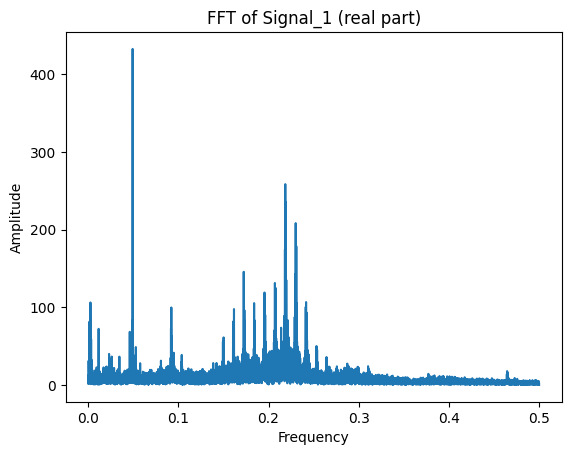

In [5]:
signal_1 = all_dfs[0]['bearing_1'].values

# Perform FFT
fft_result_1 = sp.fft.rfft(signal_1)

# Assuming the signal is sampled at regular intervals
# Frequency bins corresponding to FFT
frequency_bins_1 = sp.fft.rfftfreq(len(signal_1))

plt.plot(frequency_bins_1, np.abs(fft_result_1))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of Signal_1 (real part)')
plt.show()

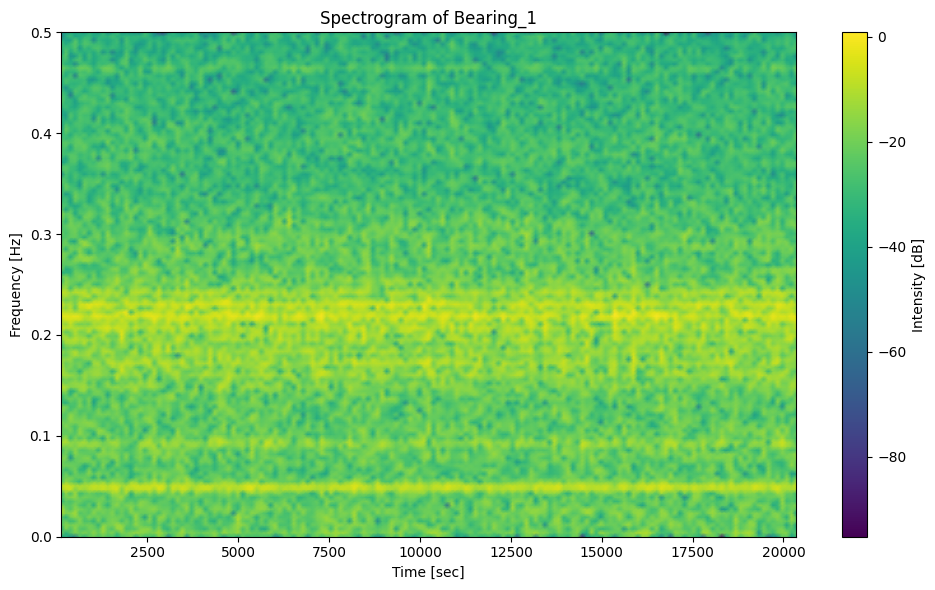

In [5]:
from scipy.signal import spectrogram

# Define parameters for STFT
window_size = 256  # Size of the window for STFT
overlap = 0.5  # Overlap between consecutive windows

# SFT = ShortTimeFFT()

freqs, times, Sxx = spectrogram(signal_1, fs=1, window='hann', nperseg=window_size, noverlap=int(window_size*overlap))

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Bearing_1')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

## All bearings in all_dfs[0]

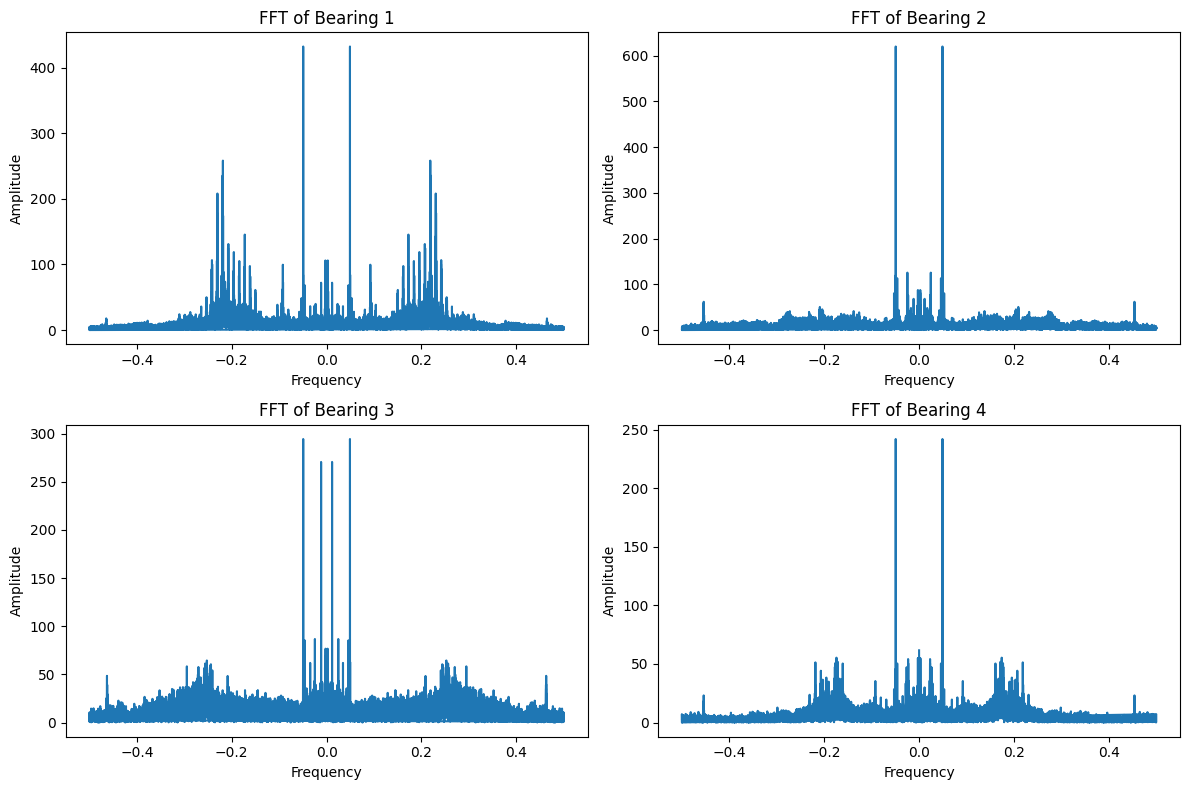

In [6]:
fft_results = []

# Iterate over columns
for i in range(1, 5):
    # Get signal data from respective column
    signal = all_dfs[0][f'bearing_{i}'].values
    
    # Perform FFT
    fft_result = np.fft.fft(signal)
    
    # Assuming the signal is sampled at regular intervals
    # Frequency bins corresponding to FFT
    frequency_bins = np.fft.fftfreq(len(signal))
    
    # Store FFT result
    fft_results.append((frequency_bins, np.abs(fft_result)))

# Plotting the FFT results
plt.figure(figsize=(12, 8))
for i, (freq_bins, fft_result) in enumerate(fft_results, 1):
    plt.subplot(2, 2, i)
    plt.plot(freq_bins, fft_result)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of Bearing {i}')
plt.tight_layout()
plt.show()

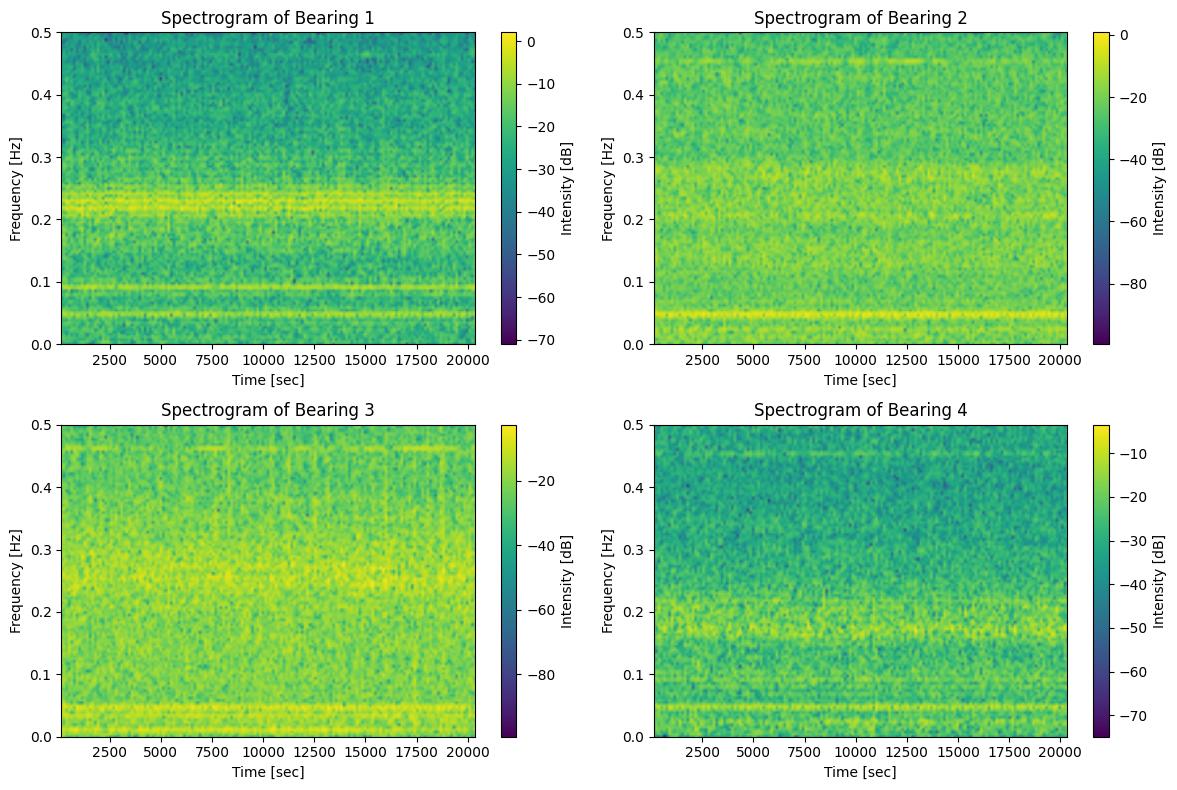

In [7]:
window_size = 256  # Size of the window for STFT
overlap = 0.5  # Overlap between consecutive windows

# List to store spectrogram results for each bearing
spectrograms = []

# Iterate over columns
for i in range(1, 5):
    # Get signal data from respective column
    signal = df[f'bearing_{i}'].values
    
    # Compute spectrogram
    freqs, times, Sxx = spectrogram(signal, fs=1, window='hann', nperseg=window_size, noverlap=int(window_size*overlap))
    
    # Store spectrogram
    spectrograms.append((freqs, times, Sxx))

# Plotting the spectrograms
plt.figure(figsize=(12, 8))
for i, (freqs, times, Sxx) in enumerate(spectrograms, 1):
    plt.subplot(2, 2, i)
    plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(f'Spectrogram of Bearing {i}')
    plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()

## Spectrograms for all_dfs

In [8]:
# # Define parameters for STFT
# window_size = 256  # Size of the window for STFT
# overlap = 0.5  # Overlap between consecutive windows

# # Iterate over each dataset
# for df_index, df in enumerate(all_dfs, start=1):
#     # Iterate over bearings
#     for bearing_index in range(1, 5):
#         # Get signal data from respective column
#         signal = df[f'bearing_{bearing_index}'].values
        
#         # Compute spectrogram
#         freqs, times, Sxx = spectrogram(signal, fs=1, window='hann', nperseg=window_size, noverlap=int(window_size*overlap))
        
#         # Plotting the spectrogram
#         plt.figure(figsize=(10, 6))
#         plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), shading='gouraud')
#         plt.ylabel('Frequency [Hz]')
#         plt.xlabel('Time [sec]')
#         plt.title(f'Spectrogram of Bearing {bearing_index} in Dataset {df_index}')
#         plt.colorbar(label='Intensity [dB]')
#         plt.tight_layout()
        
#         # Save the plot as an image
#         plt.savefig(f'spectrogram_dataset{df_index}_bearing{bearing_index}.png')
        
#         # Close the current plot to release memory
#         plt.close()

In [9]:
print(os.listdir())

['.DS_Store', 'bearing_sensor_data', 'spectrograms_test', 'Bearing_Sensors.ipynb', 'Sensor Anomaly Detection.ipynb', '.ipynb_checkpoints']


In [6]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Define directories containing spectrogram images
image_dir = 'spectrograms_test'

batch_size = 1

images = image_dataset_from_directory(
    directory=image_dir,
    labels=None,
    image_size=(120, 200),
    batch_size=batch_size,
    subset=None,
    shuffle=True)

# num_images = len(images.filenames)
# print(f"Number of images: {num_images}")

num_batches = len(images)
print(f"Number of batches: {num_batches}")

# Get the first batch of data from the dataset
first_batch = next(iter(images))

# Access the first image within the first batch
first_image = first_batch[0]

# Print the shape of the first image
print("Shape of the first image:", first_image.shape)

Found 3928 files belonging to 1 classes.
Number of batches: 3928
Shape of the first image: (120, 200, 3)


2024-03-07 12:15:27.100503: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [13]:
x_train = list(images.as_numpy_iterator()[:1000])

TypeError: 'BatchDataset' object is not subscriptable

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(np.prod([120, 200, 3]),))  # assuming RGB images
# input_img = Input(shape=(np.prod([256, 256, 3]),))

encoder_dim = 1024

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoder_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(np.prod([120, 200, 3]), activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoder_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72000)]           0         
                                                                 
 dense (Dense)               (None, 1024)              73729024  
                                                                 
 dense_1 (Dense)             (None, 72000)             73800000  
                                                                 
Total params: 147,529,024
Trainable params: 147,529,024
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.model_selection import train_test_split

images_list = list(images.as_numpy_iterator())

x_train, x_test = train_test_split(images_list, test_size=0.2, random_state=42)

x_train = np.array(x_train)/ 255.
x_test = np.array(x_test)/ 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(3142, 72000)
(786, 72000)


In [14]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
13/13 [==============================] - 6s 471ms/step - loss: 0.4796 - val_loss: 0.4011
Epoch 2/20
13/13 [==============================] - 6s 449ms/step - loss: 0.3981 - val_loss: 0.3948
Epoch 3/20
13/13 [==============================] - 6s 446ms/step - loss: 0.3943 - val_loss: 0.3933
Epoch 4/20
13/13 [==============================] - 6s 446ms/step - loss: 0.3935 - val_loss: 0.3948
Epoch 5/20
13/13 [==============================] - 6s 459ms/step - loss: 0.3938 - val_loss: 0.3918
Epoch 6/20
13/13 [==============================] - 6s 459ms/step - loss: 0.3913 - val_loss: 0.3901
Epoch 7/20
13/13 [==============================] - 6s 446ms/step - loss: 0.3898 - val_loss: 0.3895
Epoch 8/20
13/13 [==============================] - 6s 448ms/step - loss: 0.3894 - val_loss: 0.3893
Epoch 9/20
13/13 [==============================] - 6s 446ms/step - loss: 0.3893 - val_loss: 0.3893
Epoch 10/20
13/13 [==============================] - 6s 447ms/step - loss: 0.3893 - val_loss: 0.3893

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

25/25 [==============================] - 0s 11ms/step


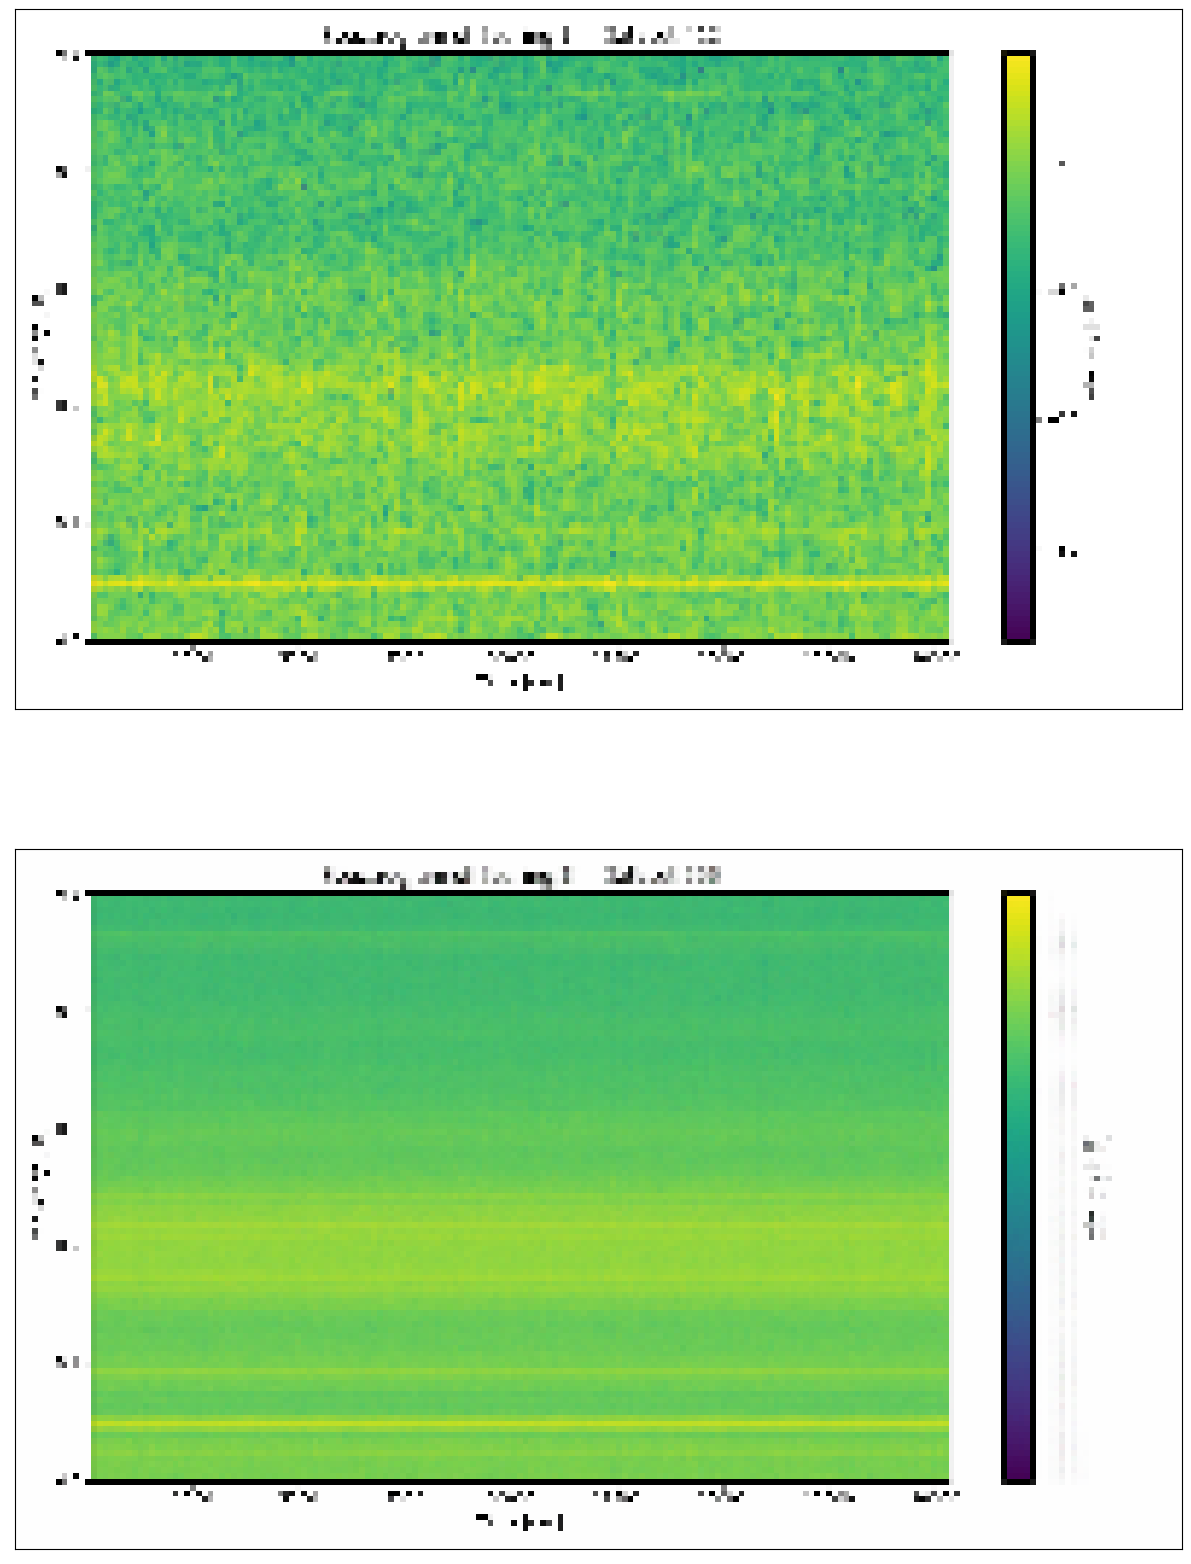

In [16]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # How many digits we will display
plt.figure(figsize=(20, 20))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(120, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(120, 200, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
from tensorflow.keras import layers, models

# Define the input layer
input_img = layers.Input(shape=(120, 200, 3))  # Input shape corresponds to (height, width, channels)

# Encoder layers
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output shape is same as input shape

# Define autoencoder model
autoencoder = models.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 120, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 100, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 100, 8)        1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 50, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 50, 8)         584 

In [19]:
images_list = list(images.as_numpy_iterator())

x_train, x_test = train_test_split(images_list, test_size=0.2, random_state=42)

x_train = np.array(x_train)/ 255.
x_test = np.array(x_test)/ 255.

x_train = x_train.squeeze(axis=1)
x_test = x_test.squeeze(axis=1)

print(x_train.shape)
print(x_test.shape)

(3142, 120, 200, 3)
(786, 120, 200, 3)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50


ValueError: in user code:

    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/katieoneill/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 116, 196, 3) vs (None, 120, 200, 3)).


In [21]:
original_dim = 120 * 200 * 3
intermediate_dim = 128
latent_dim = 2

inputs = Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [22]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [23]:
# Create encoder
encoder = Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [24]:
reconstruction_loss = tf.keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim

# Compute KL divergence loss
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5

# Combine reconstruction loss and KL divergence loss
vae_loss = K.mean(reconstruction_loss + kl_loss)

# Add VAE loss to the VAE model
vae.add_loss(vae_loss)

# Compile the VAE model
vae.compile(optimizer='adam')

In [25]:
images_list = list(images.as_numpy_iterator())

x_train, x_test = train_test_split(images_list, test_size=0.2, random_state=42)

x_train = np.array(x_train)/ 255.
x_test = np.array(x_test)/ 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(3142, 72000)
(786, 72000)


In [26]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
99/99 [==============================] - 3s 26ms/step - loss: 30209.2871 - val_loss: 28644.5508
Epoch 2/100
99/99 [==============================] - 3s 27ms/step - loss: 28534.2129 - val_loss: 28465.0449
Epoch 3/100
99/99 [==============================] - 3s 27ms/step - loss: 28434.8418 - val_loss: 28424.8145
Epoch 4/100
99/99 [==============================] - 3s 26ms/step - loss: 28391.5352 - val_loss: 28368.0234
Epoch 5/100
99/99 [==============================] - 3s 27ms/step - loss: 28372.4668 - val_loss: 28370.1816
Epoch 6/100
99/99 [==============================] - 3s 26ms/step - loss: 28356.3730 - val_loss: 28342.2891
Epoch 7/100
99/99 [==============================] - 3s 27ms/step - loss: 28349.1973 - val_loss: 28343.3691
Epoch 8/100
99/99 [==============================] - 3s 26ms/step - loss: 28335.4043 - val_loss: 28341.4219
Epoch 9/100
99/99 [==============================] - 3s 26ms/step - loss: 28332.9316 - val_loss: 28337.7070
Epoch 10/100
99/99 [========

786/786 [==============================] - 1s 822us/step
[[[-1.0430055   1.4582136 ]
  [-0.15969834  2.2485325 ]
  [ 1.7024165   1.6105497 ]
  ...
  [-0.10405985  2.959133  ]
  [-0.15280333  1.4739985 ]
  [ 0.32219312  0.56190324]]

 [[-1.8139937  -1.212275  ]
  [-1.9207989  -1.4014721 ]
  [-1.8626523  -1.9601972 ]
  ...
  [-2.0087798  -1.3675361 ]
  [-1.8256385  -1.4571207 ]
  [-1.7186667  -1.6516395 ]]

 [[-1.0663394   1.4423863 ]
  [-0.17828663  2.28982   ]
  [ 1.7090873   1.5984159 ]
  ...
  [-0.09933387  2.983308  ]
  [-0.15902068  1.513013  ]
  [ 0.35785028  0.5745954 ]]]


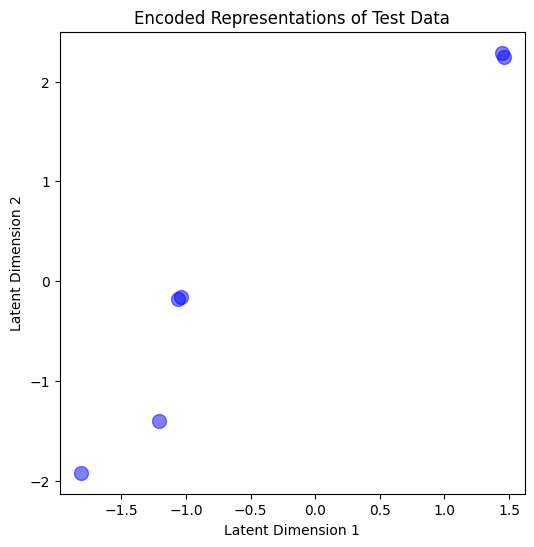

In [33]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

x_test_encoded = np.array(x_test_encoded)
print(x_test_encoded)

plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], color='b', alpha=0.5, s=100)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Encoded Representations of Test Data')
plt.show()